# **Vazifa. Mushroom (qoʻziqorin) dataset bilan klassifikatsiya modeli qurish**

**Maʼlumotlar toʻplami:**[ Mushroom Dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification/data)


**Vazifa maqsadi:** klassifikatsiyada **KNN, Decision Tree, Random Forest, Logistic Regression** algoritmlarini oʻrganish.
---

### **Vazifalar**

1. **Maʼlumotlarni yuklash va tozalash**  
   - Datasetni yuklab oling va Pandas yordamida oʻqing.  
   - Kategorik ustunlarni tekshiring, agar kerak boʻlsa, one-hot encoding yoki label encoding qiling.  
   - Null qiymatlar mavjudligini tekshiring va kerak bo‘lsa, tozalang.

2. **Maʼlumotlarni tahlil qilish**  
   - Ustunlarning tarqalishini vizualizatsiya qiling.  
   - Maqsad ustunining balansini tekshiring (nechta zaharli va zaharsiz qo‘ziqorinlar bor).  
   - Har bir xususiyatning maqsad ustuniga ta’sirini tahlil qiling.

3. **Modellarni qurish va taqqoslash**  
   - Ma’lumotlarni **training** va **test** to‘plamlariga ajrating (80/20 yoki 70/30).  
   - Quyidagi klassifikatsiya algoritmlarini qo‘llang va natijalarni solishtiring:
     - **K-Nearest Neighbors (KNN)**
     - **Decision Tree**
     - **Random Forest**
     - **Logistic Regression**
   - Har bir model uchun **Confusion Matrix, Precision, Recall, F1-Score** hisoblang.

4. **Model natijalarini vizualizatsiya qilish**  
   - Har bir model uchun **Confusion Matrix**ʼni chizib chiqing.  
   - Precision, Recall va F1-Score’larni bar grafigi ko‘rinishida solishtiring.

5. **Eng yaxshi modelni tanlash**  
   - Qaysi model eng yaxshi natija berdi?  
   - Qaysi metrikaga ko‘ra tanlov qildingiz?  
   - Modelni yanada yaxshilash uchun qanday qo‘shimcha chora-tadbirlar ko‘rish mumkin?


In [ ]:
import pandas as pd
import numpy as np
import sklearn

url="https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/mushrooms.csv"
df = pd.read_csv(url)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#1. Maʼlumotlarni yuklash va tozalash

In [ ]:
#javobni shu yerda yozing.
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in df.columns:
  df[column] = label_encoder.fit_transform(df[column])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

#2. Maʼlumotlarni tahlil qilish

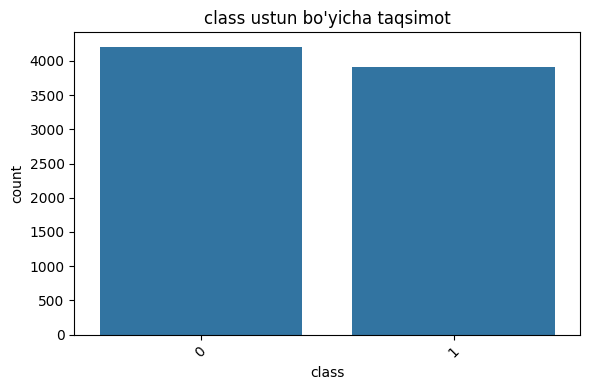

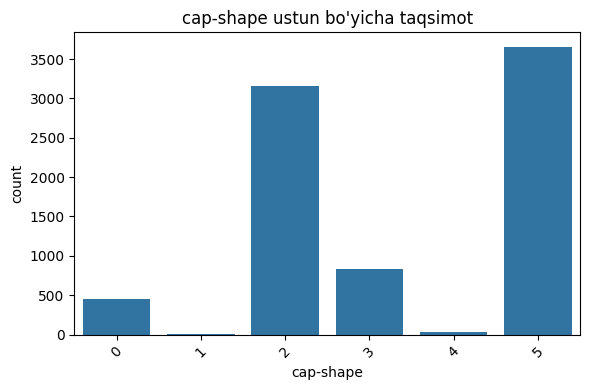

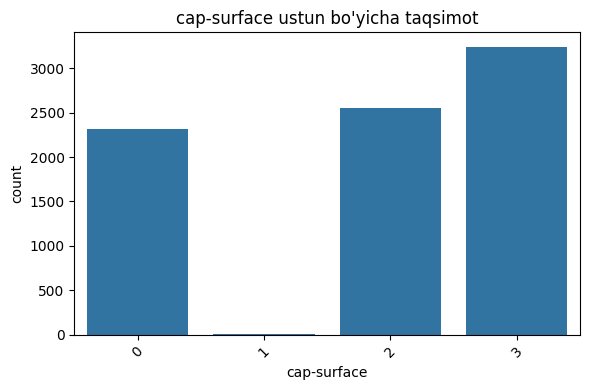

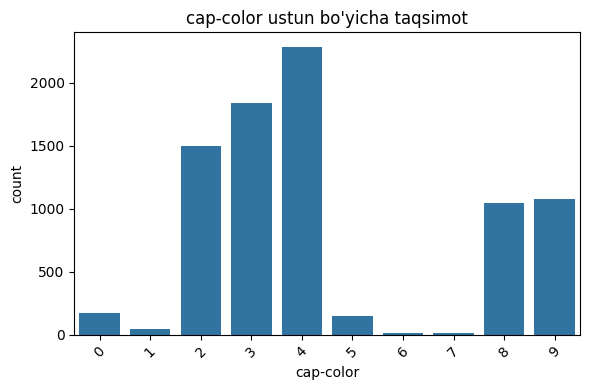

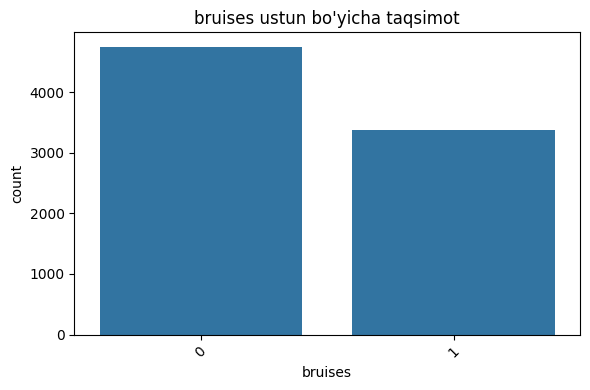

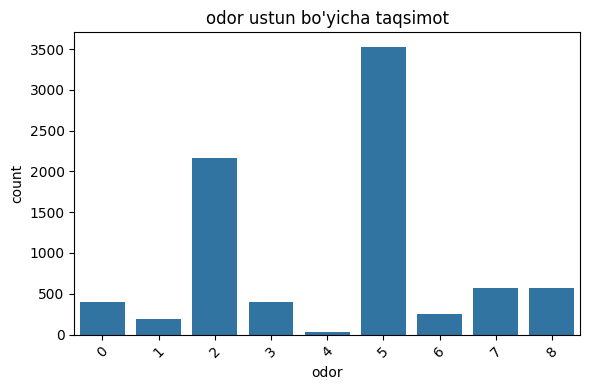

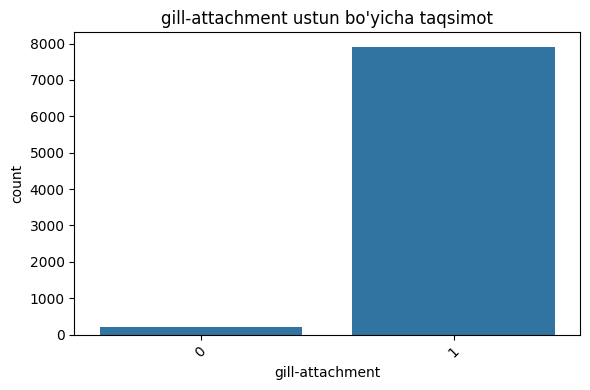

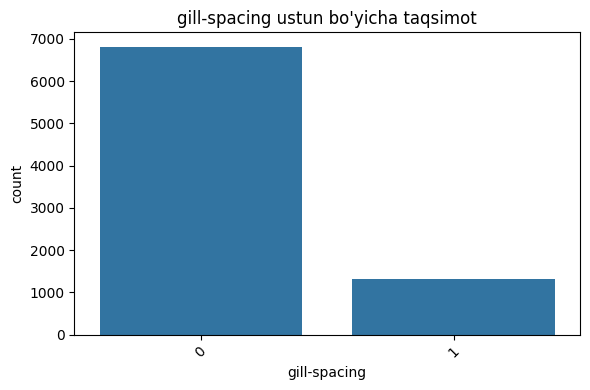

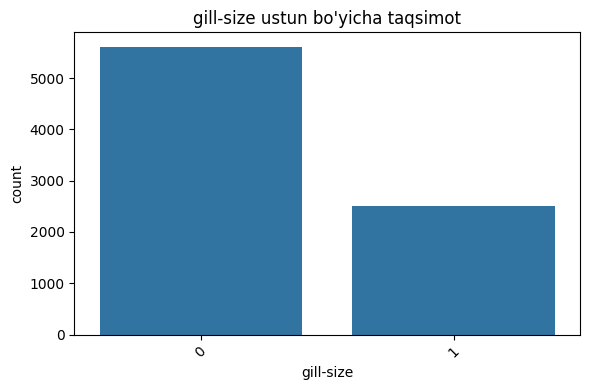

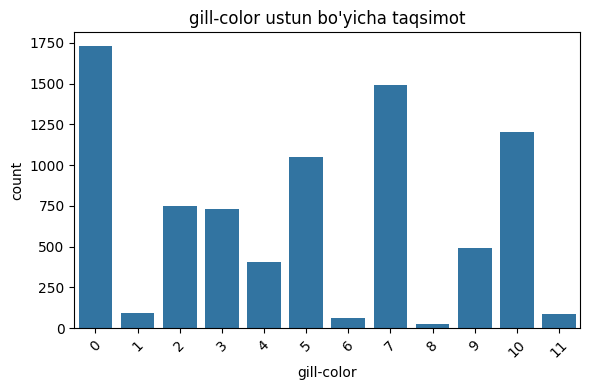

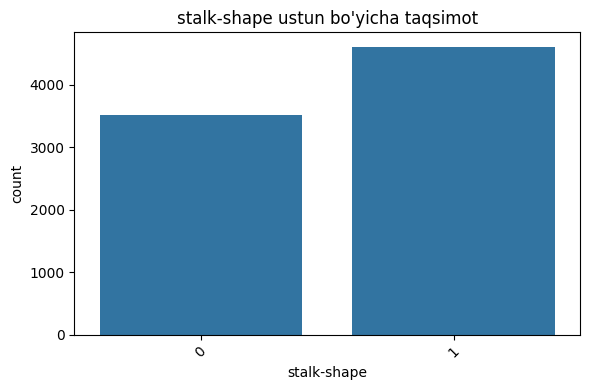

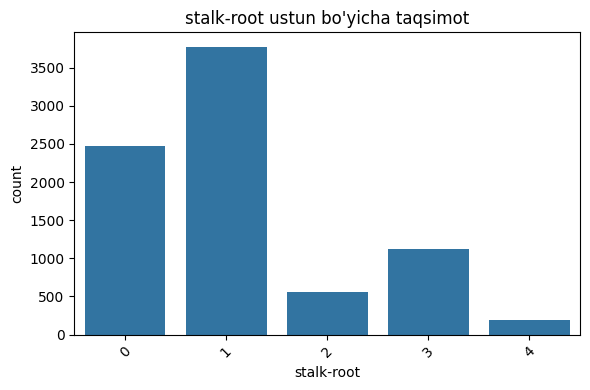

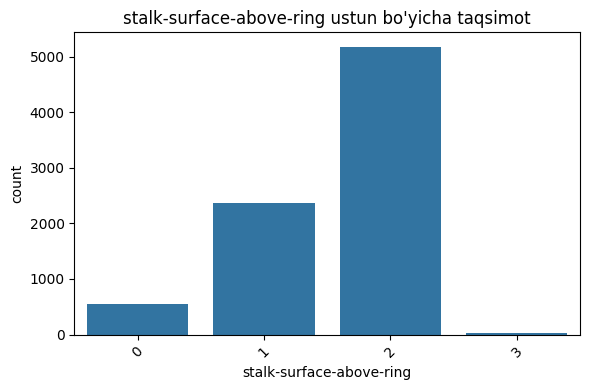

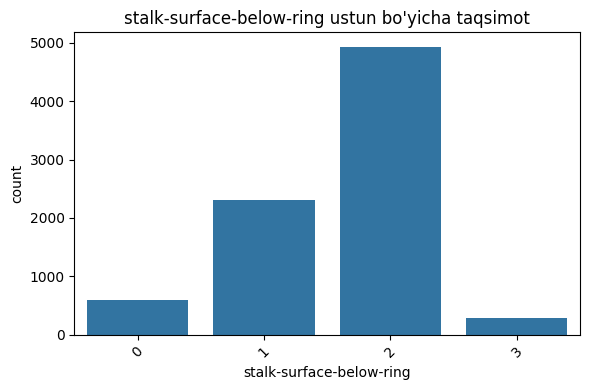

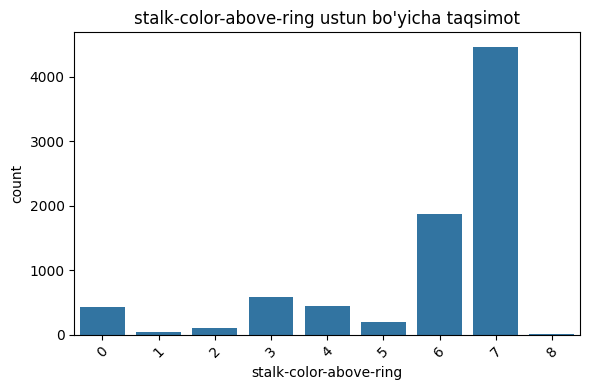

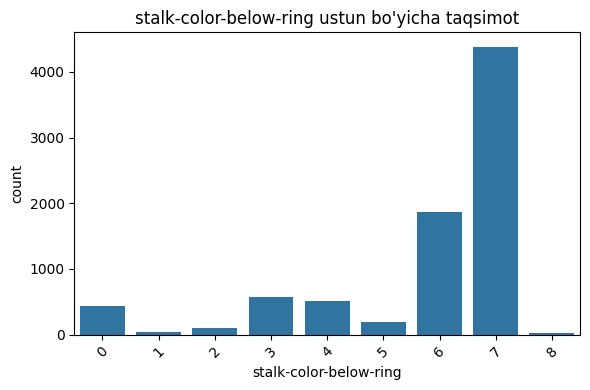

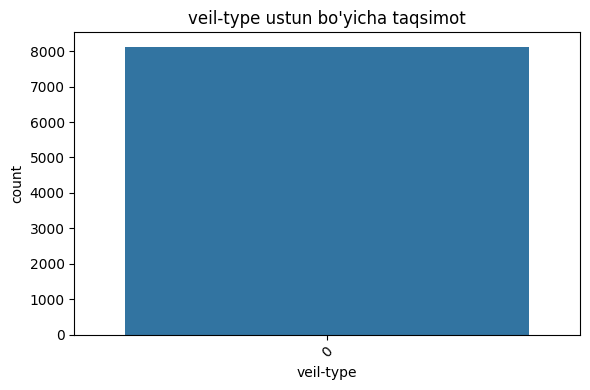

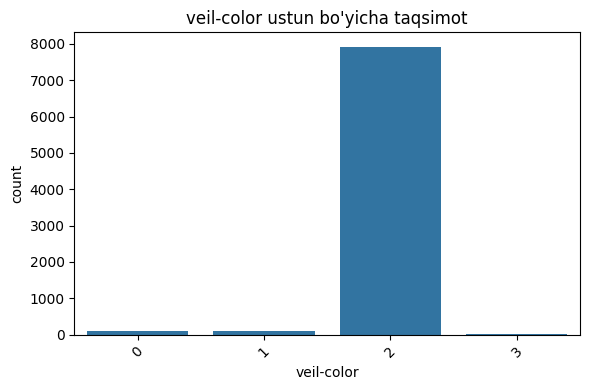

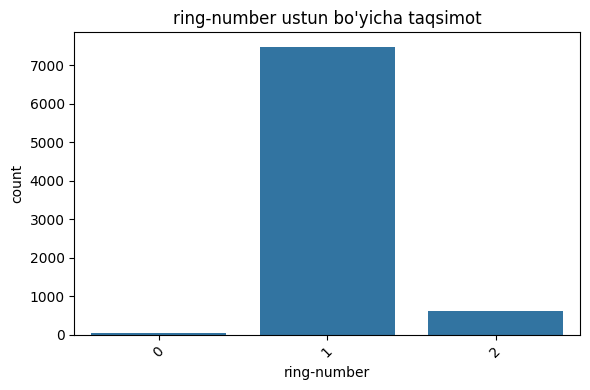

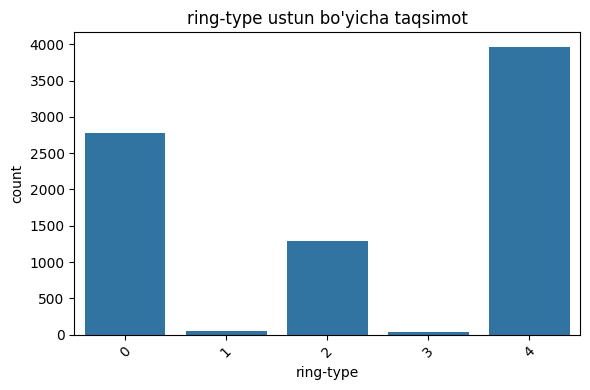

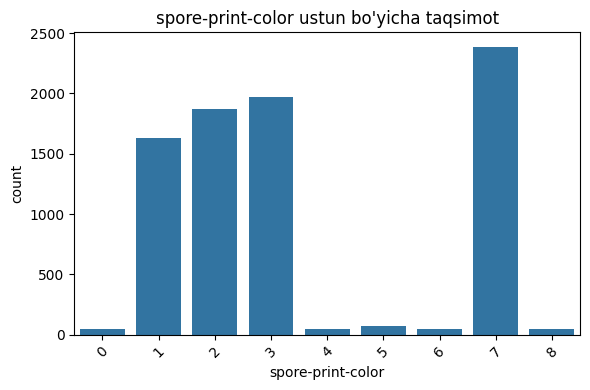

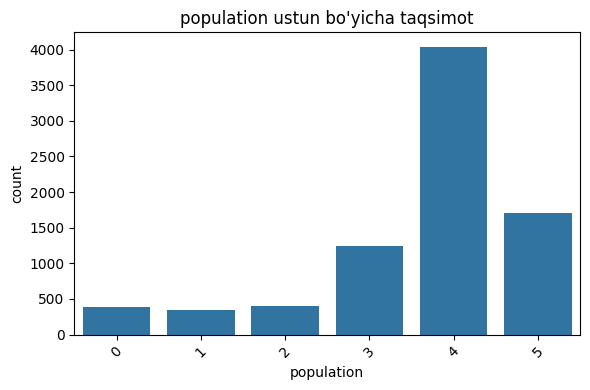

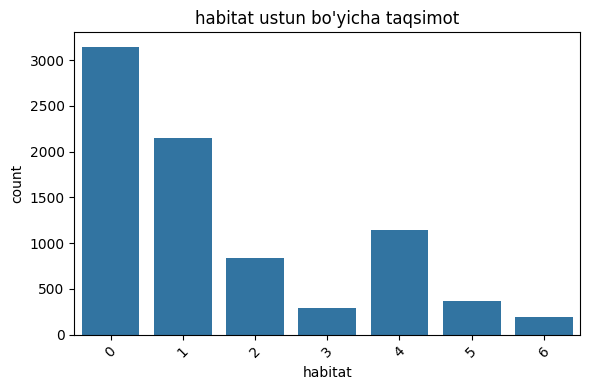

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
  plt.figure(figsize=(6,4))
  sns.countplot(x=df[column])
  plt.title(f"{column} ustun bo'yicha taqsimot")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

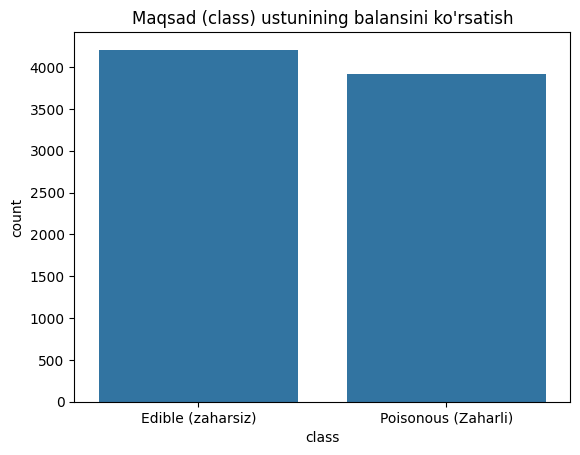

class
0    51.797144
1    48.202856
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x=df["class"])
plt.title("Maqsad (class) ustunining balansini ko'rsatish")
plt.xticks([0, 1], ["Edible (zaharsiz)", "Poisonous (Zaharli)"])
plt.show()

class_counts = df["class"].value_counts(normalize=True) * 100
print(class_counts)

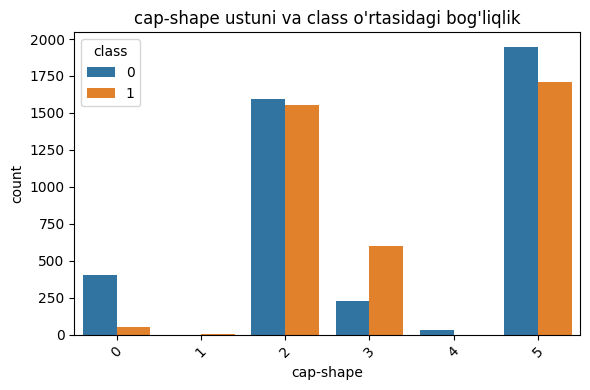

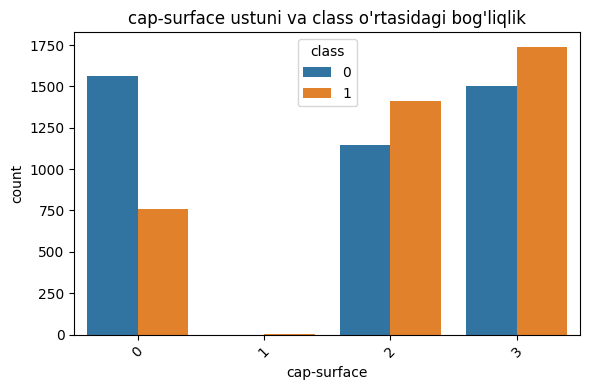

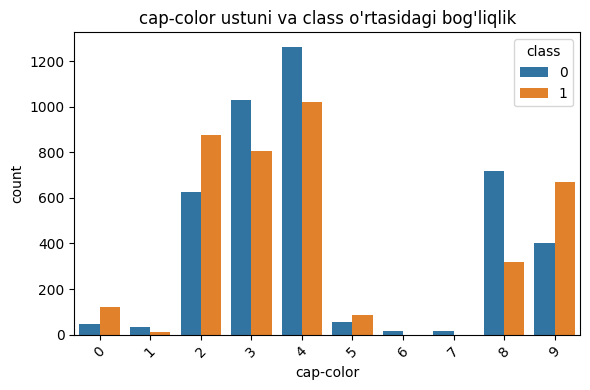

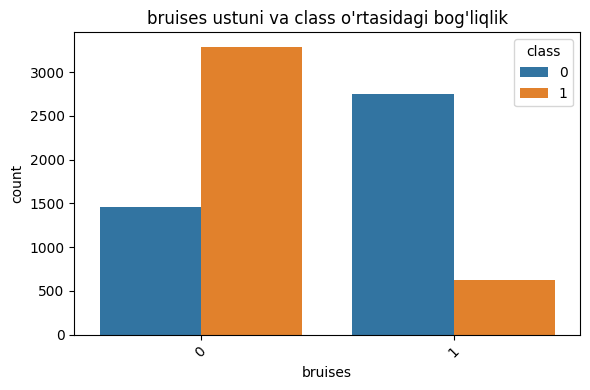

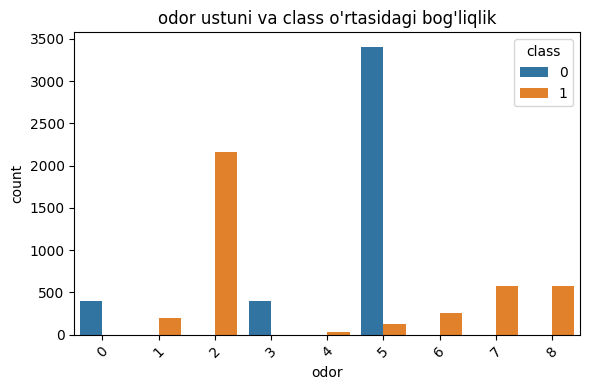

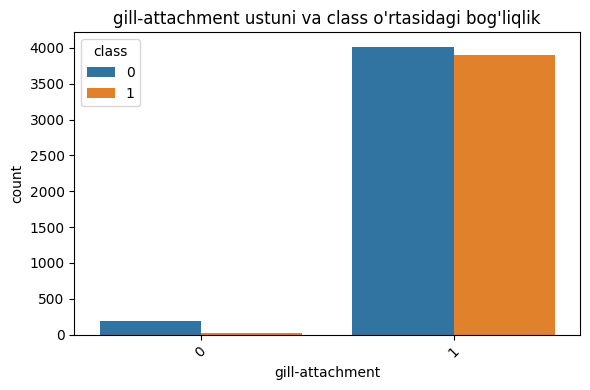

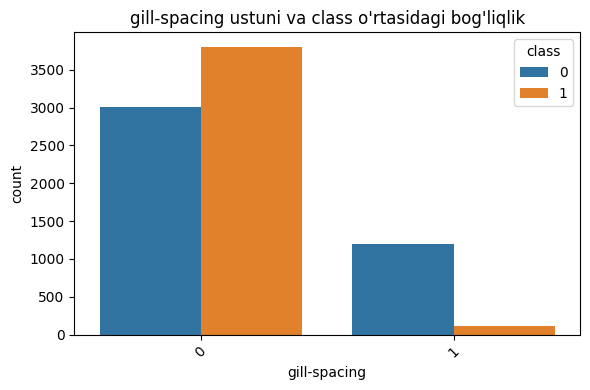

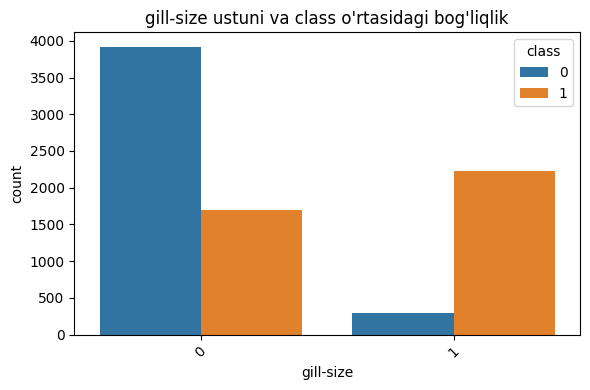

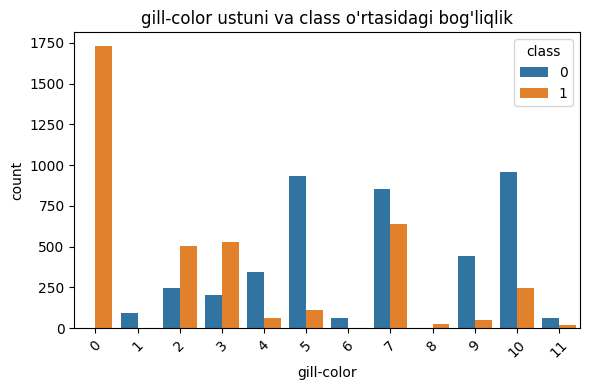

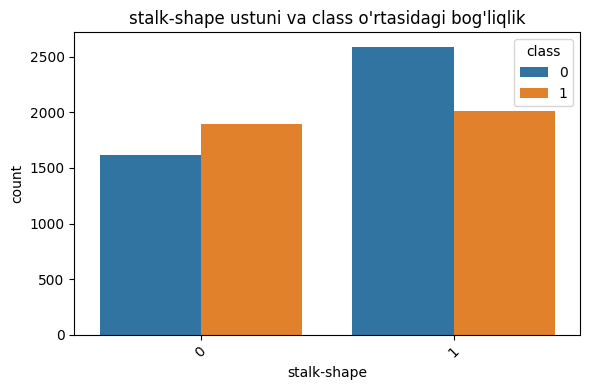

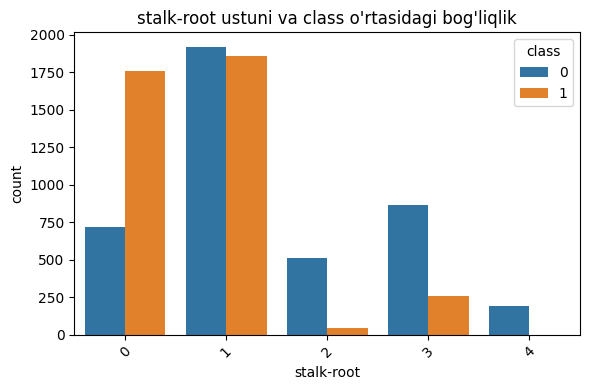

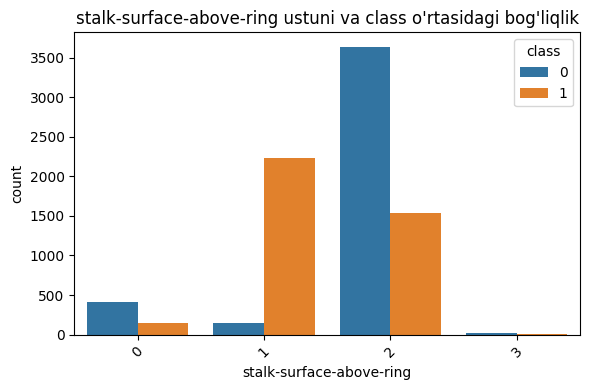

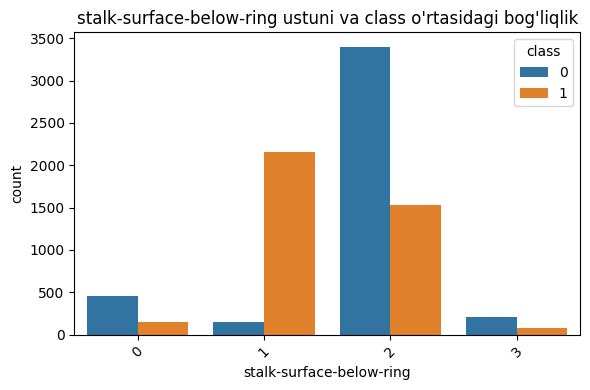

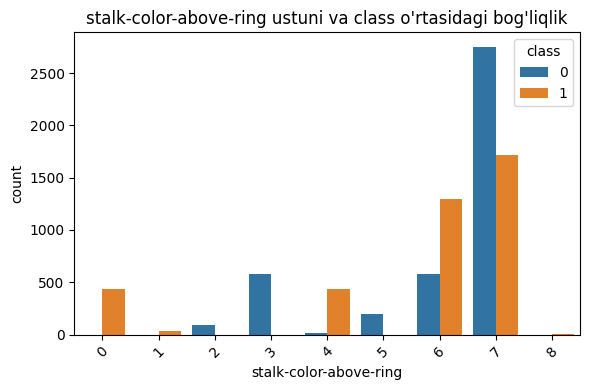

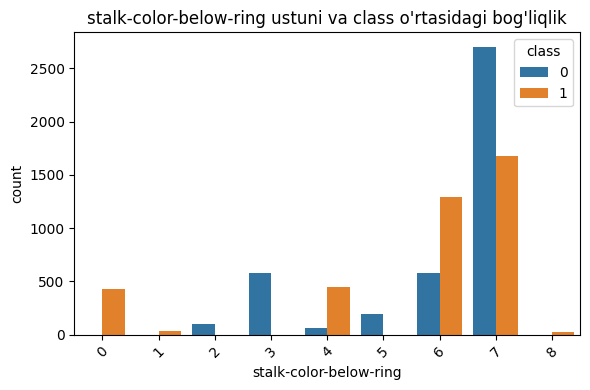

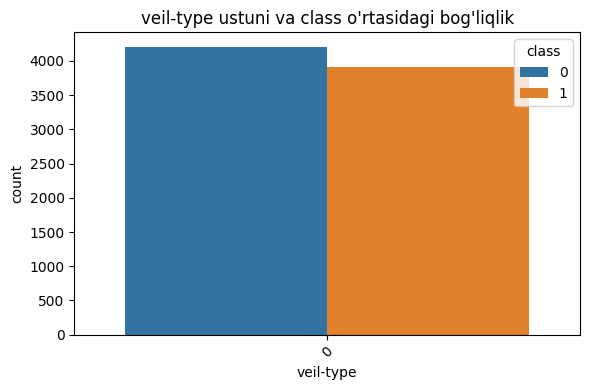

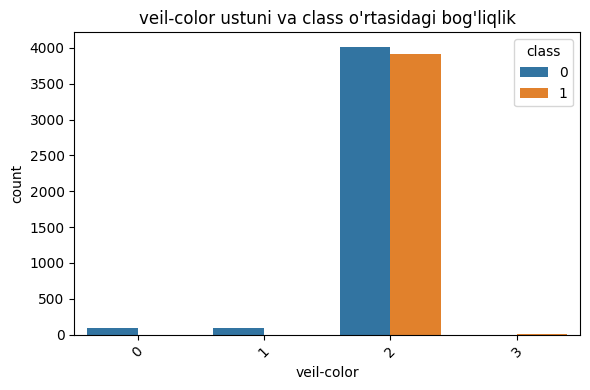

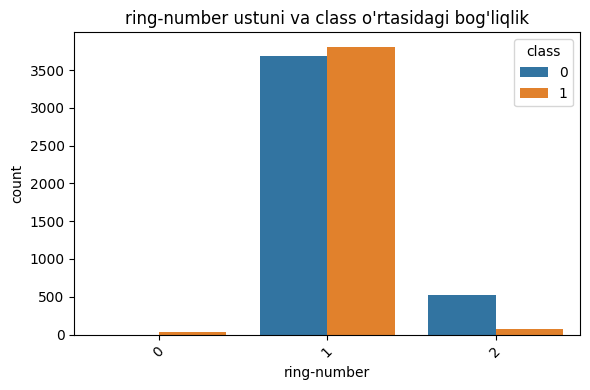

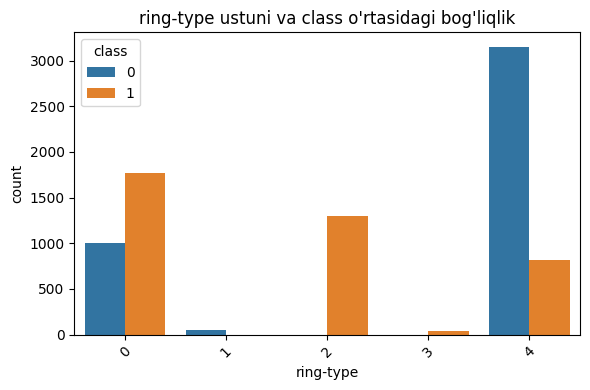

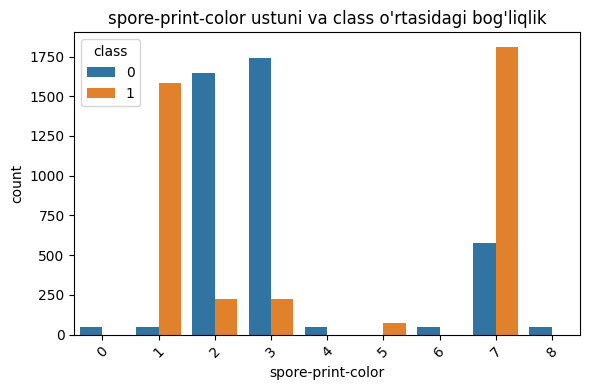

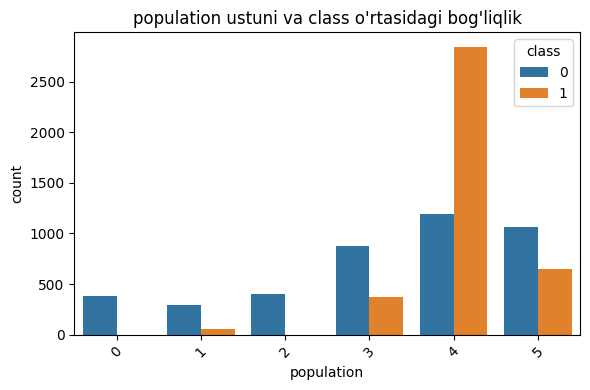

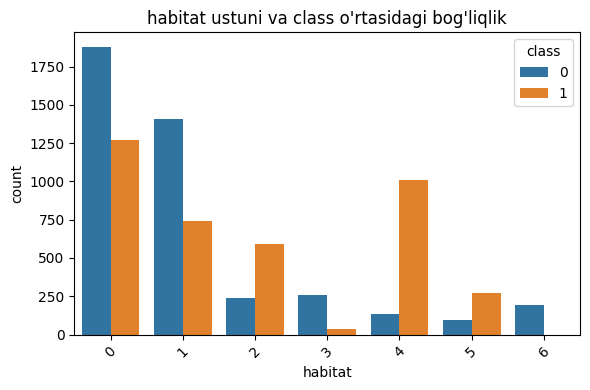

In [ ]:
for column in df.columns:
  if column != "class":
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[column], hue=df["class"])
    plt.title(f"{column} ustuni va class o'rtasidagi bog'liqlik")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#3. Modellarni qurish va taqqoslash

In [ ]:
# malumotlarni training va test to'plamiga ajratish
from sklearn.model_selection import train_test_split

x = df.drop("class", axis=1)
y = df["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# klassifiaktsiya algoritmlarini va natijalarini solishtirish

from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# natijani saqlash
results = {}

def evaluate_model(name, model):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  print(f"{name} uchun aniqlik (accuracy): {acc:.4f}")
  print(classification_report(y_test, y_pred))
  results[name] = acc

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model("KNN", knn)

KNN uchun aniqlik (accuracy): 0.9963
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
evaluate_model("Decision Tree", dt)

Decision Tree uchun aniqlik (accuracy): 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
# Random Forest
rf= RandomForestClassifier(random_state=42)
evaluate_model("Random Forest0", rf)

Random Forest0 uchun aniqlik (accuracy): 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
# Logsitic Regression
lr = LogisticRegression(max_iter=300, random_state=42)
evaluate_model("Logistic Regression", lr)

Logistic Regression uchun aniqlik (accuracy): 0.9477
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



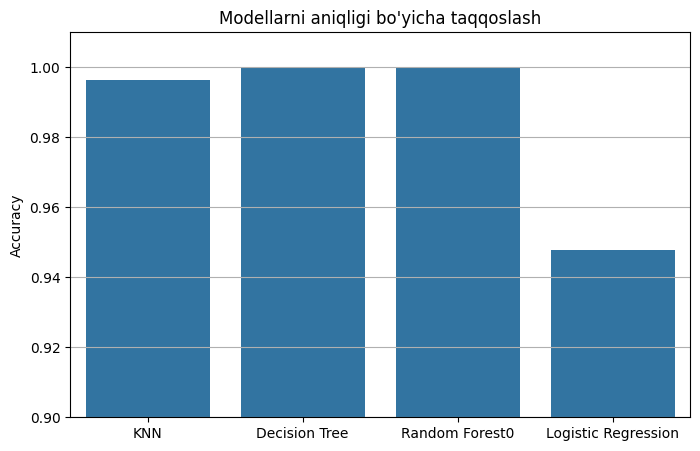

In [ ]:
# Natijalarni taqqoslash
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Modellarni aniqligi bo'yicha taqqoslash")
plt.ylim(0.9, 1.01) # bu dataset juda oson, ko‘pincha accuracy > 95%
plt.grid(axis="y")
plt.show()

# 4 Model natijalarini vizualizatsiya qilish

In [ ]:
#  1. Confusion Matrix'ni chizish (har bir model uchun)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_conf_matrix(model, name):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

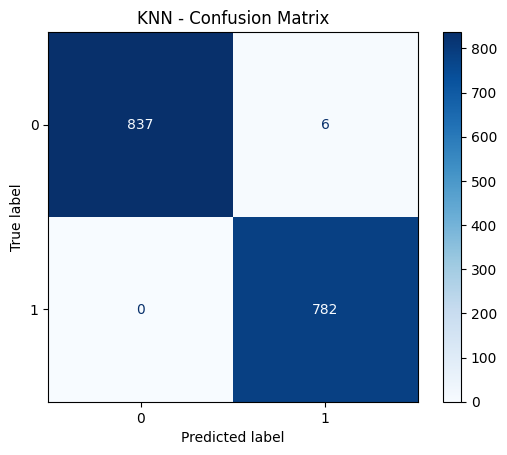

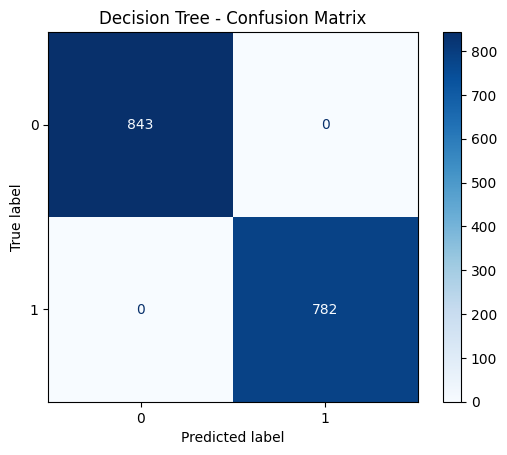

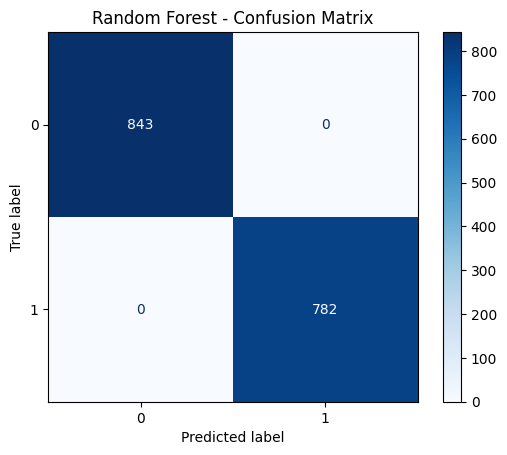

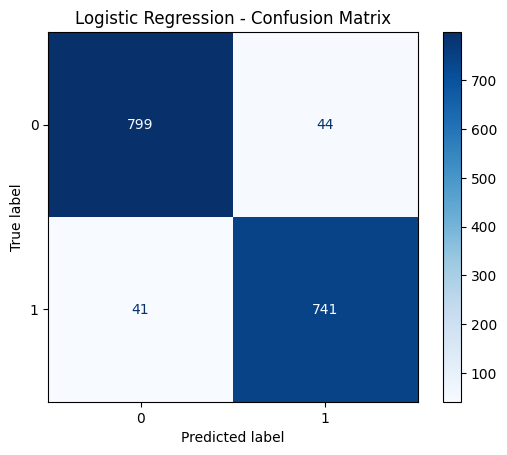

In [ ]:
plot_conf_matrix(knn, "KNN")
plot_conf_matrix(dt, "Decision Tree")
plot_conf_matrix(rf, "Random Forest")
plot_conf_matrix(lr, "Logistic Regression")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Bo‘sh dict
metrics = {
    "Model": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Baholash funksiyasi
def collect_metrics(model, name):
    y_pred = model.predict(x_test)
    metrics["Model"].append(name)
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["F1-Score"].append(f1_score(y_test, y_pred))

# Har bir model uchun hisoblaymiz
collect_metrics(knn, "KNN")
collect_metrics(dt, "Decision Tree")
collect_metrics(rf, "Random Forest")
collect_metrics(lr, "Logistic Regression")

# DataFramega o‘tkazamiz
metrics_df = pd.DataFrame(metrics)


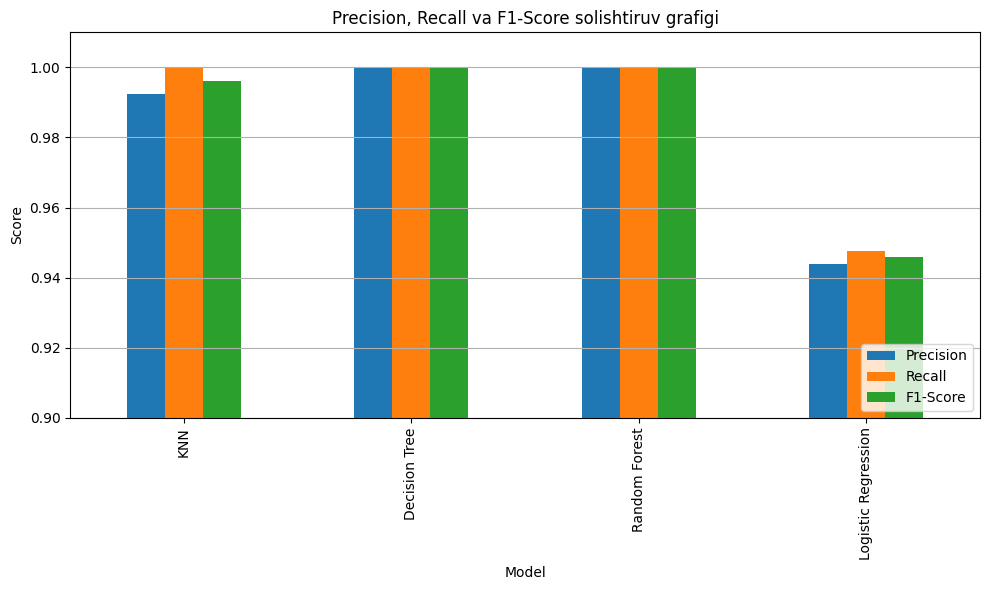

In [ ]:
# bar chartda ko'rsatish
metrics_df.set_index("Model").plot(kind="bar", figsize=(10,6))
plt.title("Precision, Recall va F1-Score solishtiruv grafigi")
plt.ylabel("Score")
plt.ylim(0.9, 1.01) # Yuqori anilik uchun
plt.grid(True, axis="y")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 5 Eng yaxshi modelni tanlash

Eng yaxshi model: Random Forest yoki Decision Tree, chunki ularning barcha metrikalari 1.00.

Qaysi metrikaga ko‘ra tanlov qildim?
Metrika: F1-Score
Chunki bu metrika Precision (aniq topilgan zaharli qo‘ziqorinlar) va Recall (topilishi kerak bo‘lgan zaharlilar) o‘rtasidagi muvozanatni hisobga oladi.

In [ ]:
# Modelni yanada yaxshilash uchun nima qilish mumkin?
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators" : [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2,5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(x_train, y_train)
print("Eng yaxshi parametrlar", grid.best_params_)

Eng yaxshi parametrlar {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# cross-validation bilan aniqlik baholash

from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(random_state=42), x, y, cv=5)
print("CV aniqligi:", scores.mean())

CV aniqligi: 0.8853642288745738


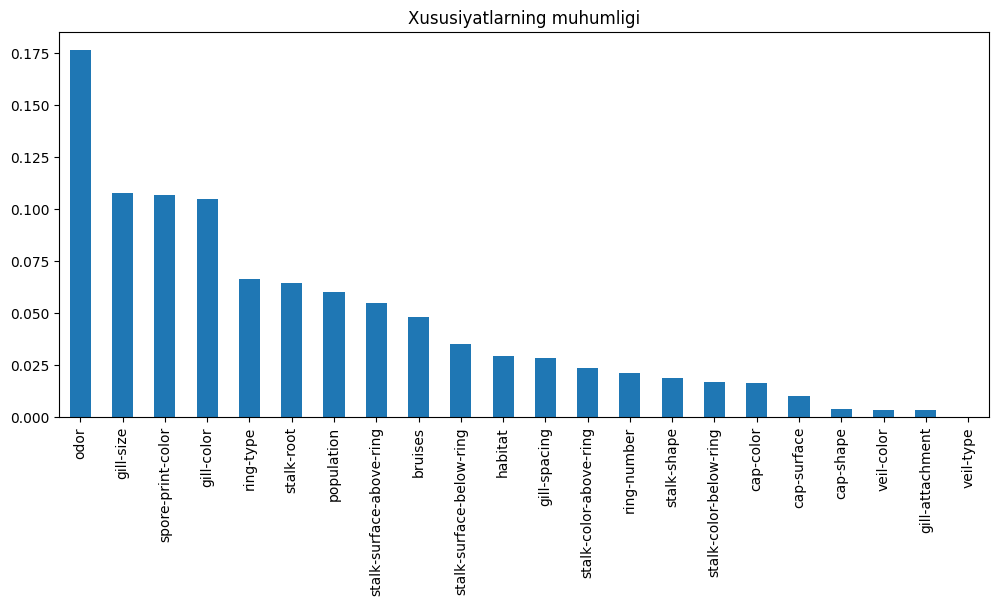

In [ ]:
# foydali ustunlarni aniqlash
importances = rf.feature_importances_
features = pd.Series(importances, index=x.columns).sort_values(ascending=False)
features.plot(kind="bar", figsize=(12,5), title="Xususiyatlarning muhumligi")
plt.show()